# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform


In [61]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.05216641 2.83763425 2.56357623 2.33283199 2.51609049 2.71480665
 2.07843336 2.05863786 2.36847766 2.1764288 ]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [90]:
# your code here
def rud(bottom, ceiling, count):
    return np.random.uniform(bottom, ceiling, count)

How are the two distributions different?

In [91]:
# your answer below
a1 = 10
b1 = 15
c1 = 100
x = rud(a1, b1, c1)
print(x)

[13.44400264 14.27663809 12.34547212 14.03925832 12.23684373 11.8951137
 10.9918272  11.6481985  13.40715624 11.73832977 11.45953011 14.38994576
 10.33550889 13.98885133 14.47361826 10.77838903 14.71089066 14.26739449
 11.954762   14.10135715 11.44966472 14.95378775 10.074642   10.88771884
 10.1464397  11.95407395 14.44432091 13.57785392 12.24376877 13.15266335
 13.31960628 10.30188143 13.88486885 13.53011488 14.67939363 14.58199784
 14.64668473 14.07586906 12.82556214 11.93619666 12.40644815 11.35711025
 11.11382372 13.92064708 14.07454859 14.59388991 12.12269627 12.41784652
 13.45065634 14.83344867 13.82183428 10.05736757 14.36825877 11.56003815
 13.3695283  12.76589202 10.23212979 12.30476784 12.99752894 10.06615136
 13.66147742 13.12421498 10.52076185 10.74337179 13.99468626 11.11963307
 12.48254787 11.48379618 12.61491428 12.30232418 14.68826822 11.44725858
 14.932271   12.57220134 10.13266995 14.86680926 11.31751506 13.90980265
 12.66779174 10.49099062 12.49470302 10.86748002 14.

In [92]:
# your answer below
a2 = 10
b2 = 60
c2 = 1000
y = rud(a2, b2, c2)
print(y)

[33.61168639 10.85304305 17.84523557 40.16373628 57.27990699 28.45432528
 29.82333195 45.4437003  35.56288229 35.89625004 25.35936652 35.17603898
 36.36414975 14.81346299 20.34137602 51.93545044 28.27675045 47.00691353
 37.94473451 11.64169926 54.16577554 57.64616168 39.97826317 35.06297763
 33.7243992  35.59679115 48.02901013 32.40397601 10.86927836 10.50319919
 27.08747897 31.62881577 31.33076001 10.42067425 39.31600653 53.41285856
 56.75432666 39.26968468 12.46506    10.16803505 57.75015253 43.66760349
 23.1923049  59.24298211 24.10068674 33.14918461 47.4558792  46.77395408
 55.15436583 51.39238149 53.49305537 29.53030024 56.85746976 42.07551724
 13.41828572 56.81298744 36.33359847 57.94487947 23.99148275 39.67339022
 41.59037981 47.55738634 16.74782477 42.06733181 50.77713487 32.52728893
 53.48367074 31.6552447  58.77282555 31.31758338 52.27810162 44.0336817
 30.50001724 12.68108832 53.26718476 48.41689457 13.30552061 59.74470036
 42.82317867 55.84075319 55.23567763 25.5448016  45.

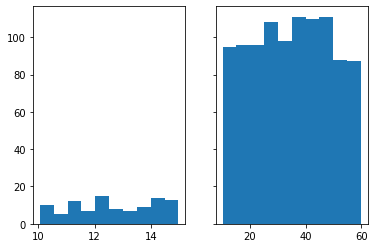

In [101]:
bins=10
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.hist(x, bins=bins)
ax2.hist(y, bins=bins)
plt.show();


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [102]:
import math
from scipy.stats import norm

In [103]:
# your code here
# your code here
def rnd(mean, sigma, count):
    return np.random.normal(mean, sigma, count)

How are the two distributions different?

In [105]:
# your answer below
mean1 = 10
st1 = 1
count1 = 1000
x = rnd(mean1, st1, count1)

In [106]:
mean2 = 10
st2 = 50
count2 = 1000
y = rnd(mean2, st2, count2)

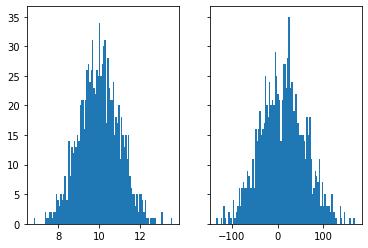

In [109]:
bins=100
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.hist(x, bins=bins)
ax2.hist(y, bins=bins)
plt.show();


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [110]:
import pandas as pd

In [113]:
# your code here
vehicles = pd.read_csv('../datasets/vehicles.csv')
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

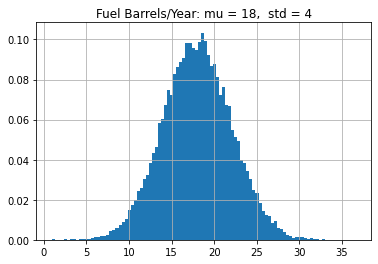

In [139]:
x = vehicles['Fuel Barrels/Year']
x_title = vehicles['Fuel Barrels/Year'].name
x_desc = x.describe()
mu = round(x_desc['mean'])
std = round(x_desc['std'])
n = round(x_desc['count'])
x = np.random.normal(mu, std, n)
bins = 100
plt.hist(x, bins=bins, density=True);
plt.title(x_title)
plt.title(f'{x_title}: mu = {mu},  std = {std}')
plt.grid(True)
plt.show()



2. CO2 Emission Grams/Mile 

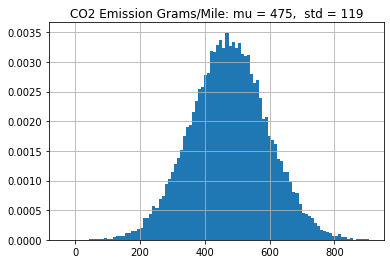

In [140]:
# your code here
x = vehicles['CO2 Emission Grams/Mile']
x_title = vehicles['CO2 Emission Grams/Mile'].name
x_desc = x.describe()
mu = round(x_desc['mean'])
std = round(x_desc['std'])
n = round(x_desc['count'])
x = np.random.normal(mu, std, n)
bins = 100
plt.hist(x, bins=bins, density=True);
plt.title(x_title)
plt.title(f'{x_title}: mu = {mu},  std = {std}')
plt.grid(True)
plt.show()


3. Combined MPG

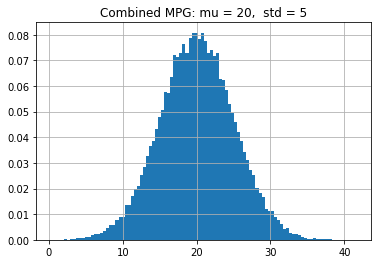

In [141]:
# your code here
x = vehicles['Combined MPG']
x_title = vehicles['Combined MPG'].name
x_desc = x.describe()
mu = round(x_desc['mean'])
std = round(x_desc['std'])
n = round(x_desc['count'])
x = np.random.normal(mu, std, n)
bins = 100
plt.hist(x, bins=bins, density=True);
plt.title(x_title)
plt.title(f'{x_title}: mu = {mu},  std = {std}')
plt.grid(True)
plt.show()


Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# your answer here
# The combined MPG because has the mean more at center

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [143]:
from scipy.stats import expon

In [174]:
# your code here
def rxd(count):
    mean=10
    return expon.rvs(scale=1, loc=mean, size=count)

How are the two distributions different?

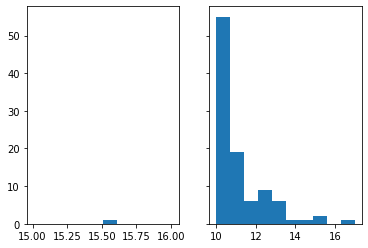

In [175]:
# your answer here
x = rxd(1)
y = rxd(100)
bins=10
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.hist(x, bins=bins)
ax2.hist(y, bins=bins)
plt.show();


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

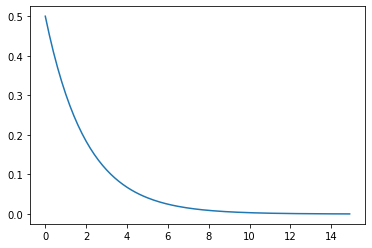

In [167]:
# your answer here
# Hint: This is same as saying P(x<15)
lambd = 0.5
mu = 10
x = np.arange(0, 15, 0.1)
y = lambd*np.exp(-lambd*x)
plt.plot(x,y)
plt.show();


What is the probability that the customer will spend more than 15 minutes

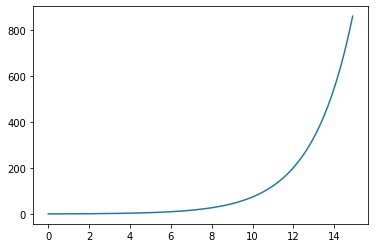

In [176]:
# your answer here
lambd = 0.5
mu = 10
x = np.arange(0, 15, 0.1)
y = lambd*np.exp(+lambd*x)
plt.plot(x,y)
plt.show();
